In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки

In [2]:
data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(data.shape)

(1338, 7)


In [4]:
display(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
display(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
ins_df = data.copy()

In [7]:
types = ins_df.dtypes

nums_feats = (types[types != 'object']).index

In [8]:
nums_feats

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

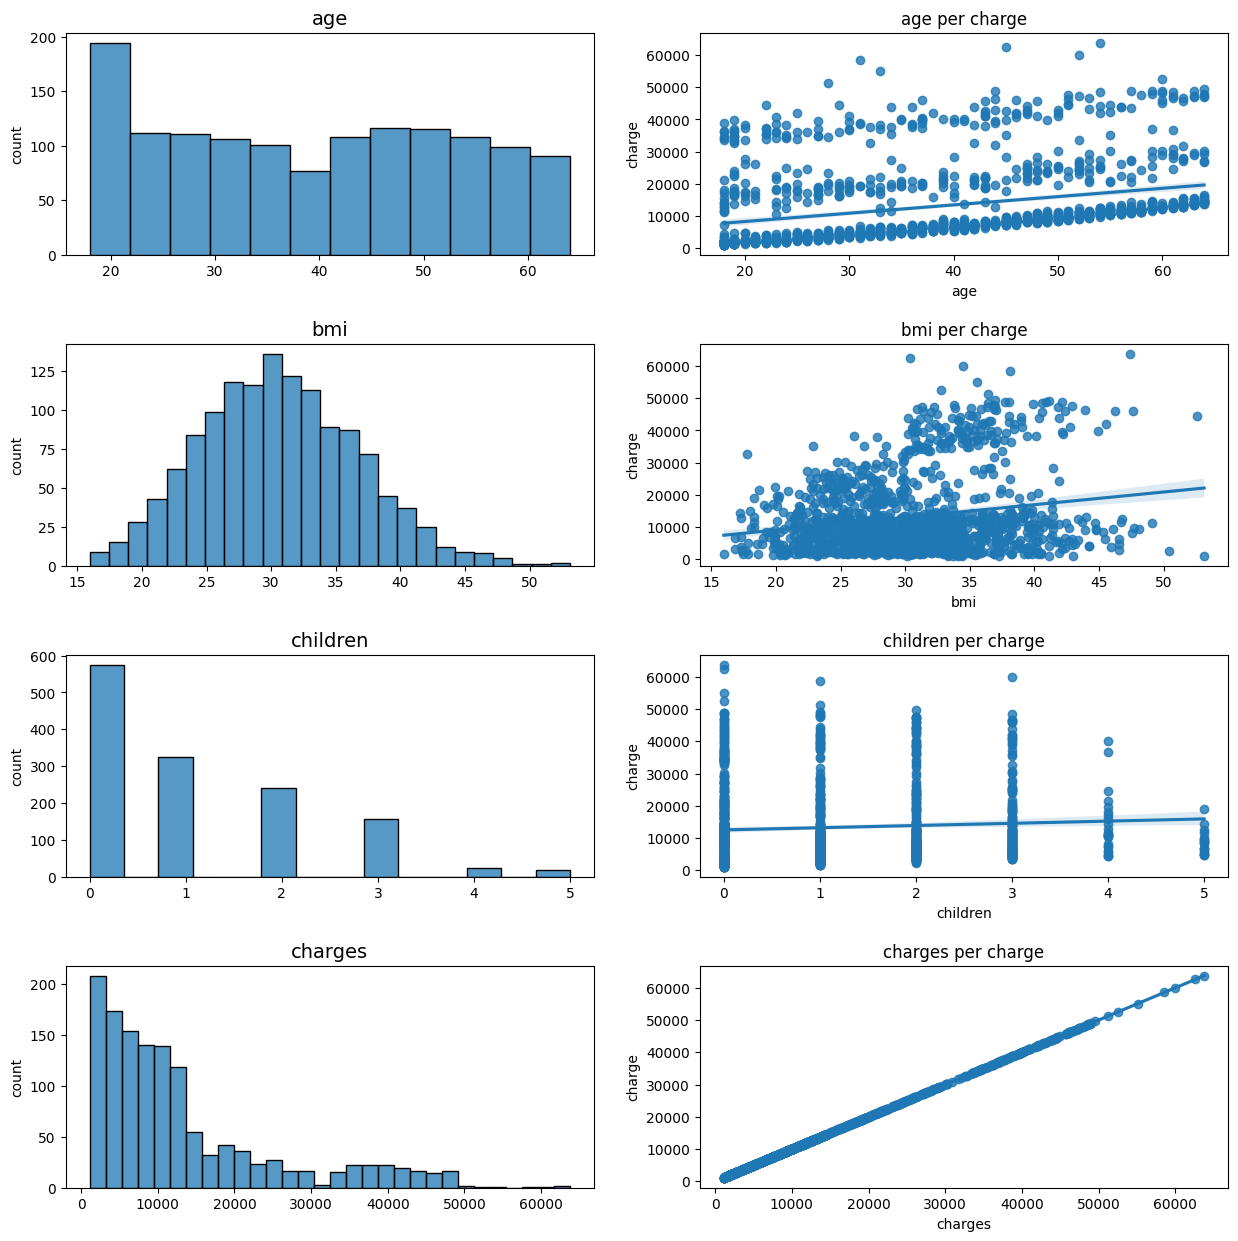

In [9]:
n = len(nums_feats)

fig, axes = plt.subplots(n, 2, figsize = (15,15))
fig.subplots_adjust(hspace=0.4)

for i, feature in enumerate(nums_feats):
    
    histplot = sns.histplot(ins_df, x = feature, ax = axes[i][0])
    histplot.set_title(f'{feature}', fontsize = 14)
    histplot.set_xlabel('')
    histplot.set_ylabel('count')
    
    regplot = sns.regplot(ins_df, x = feature, y = 'charges', ax = axes[i][1])
    regplot.set_title(f'{feature} per charge')
    regplot.set_xlabel(f'{feature}')
    regplot.set_ylabel('charge')
    

<Axes: >

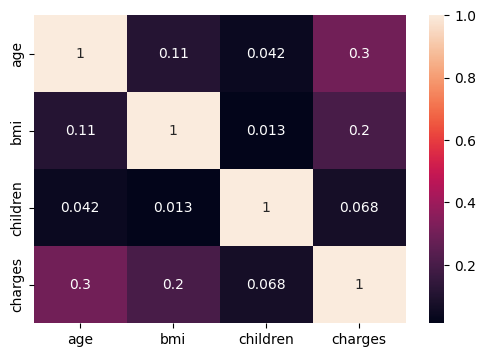

In [10]:
fig = plt.figure(figsize = (6,4))

sns.heatmap(ins_df.corr(numeric_only=True), annot=True)

In [11]:
dummies_data = pd.get_dummies(ins_df, dtype='int')
dummies_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


<Axes: >

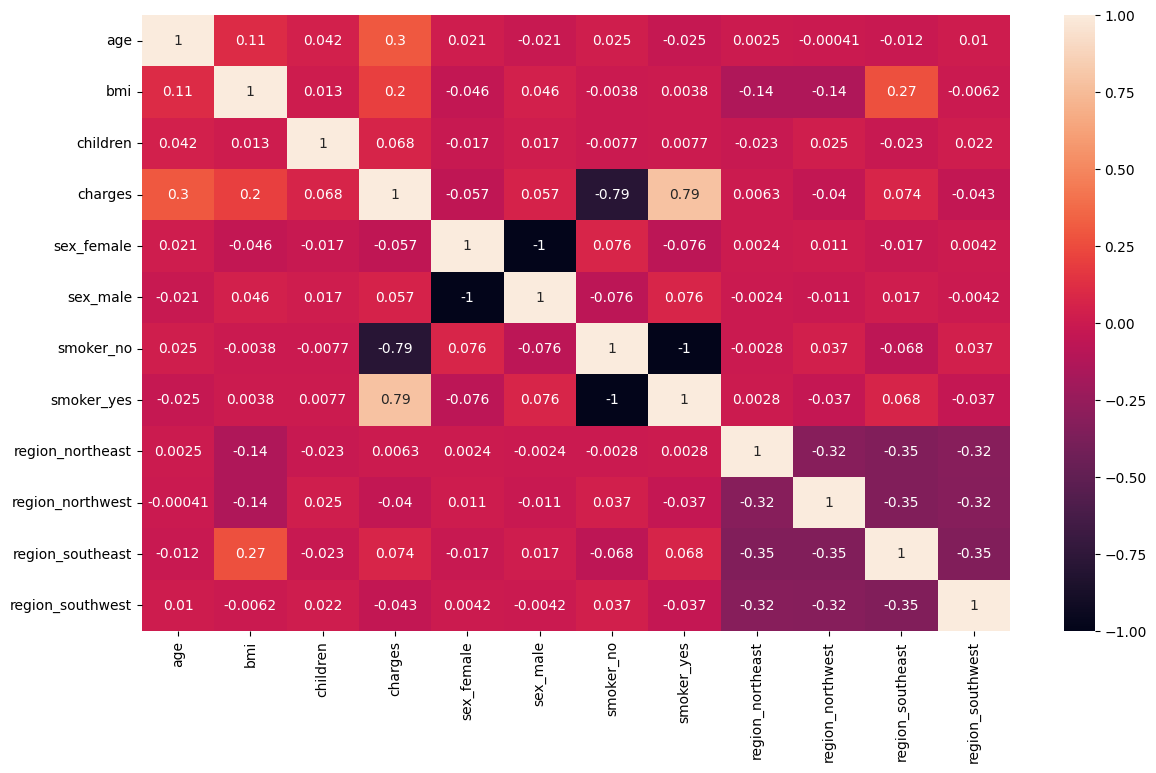

In [12]:
fig = plt.figure(figsize=(14,8))
sns.heatmap(dummies_data.corr(), annot=True)

In [13]:
dummies_data = dummies_data.drop('smoker_no', axis=1)
dummies_data = dummies_data.drop('sex_female', axis=1)
dummies_data = dummies_data.rename(columns={'smoker_yes': 'smoker', 'sex_male': 'sex'})

In [14]:
dummies_data

,age,bmi,children,charges,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,1,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,0,1


<Axes: >

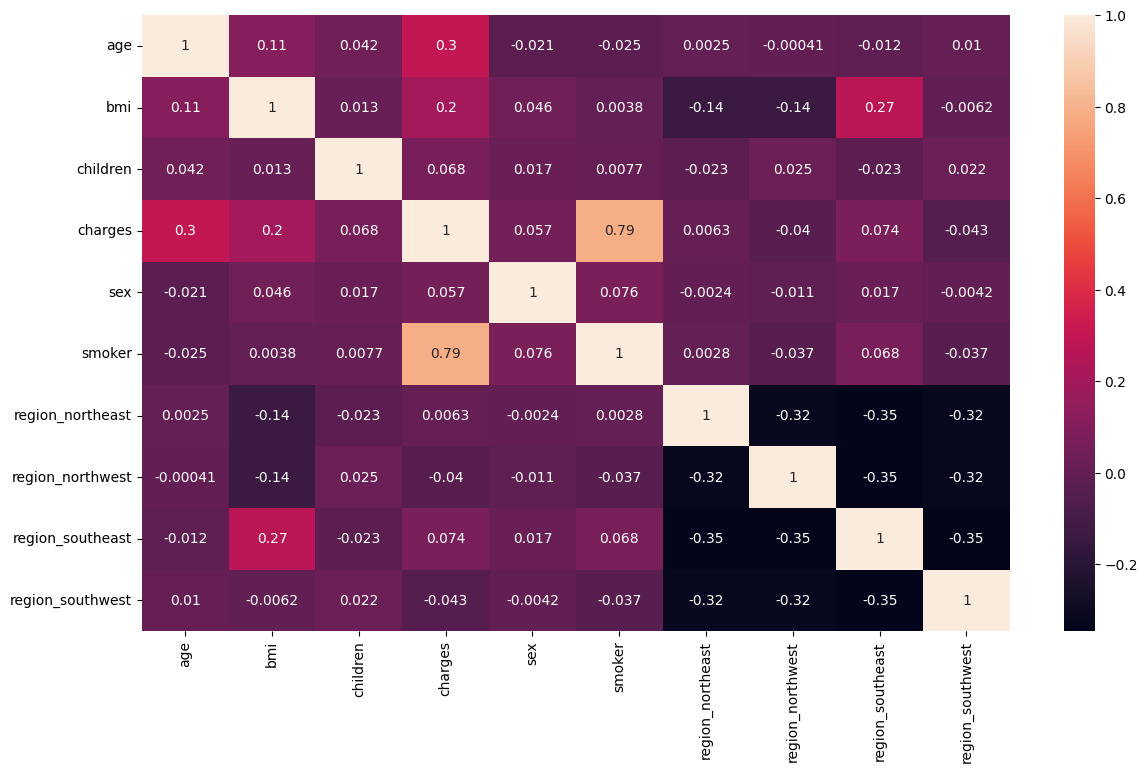

In [15]:
fig = plt.figure(figsize=(14,8))
sns.heatmap(dummies_data.corr(), annot=True)

In [16]:
X = dummies_data.drop('charges', axis=1)
y = dummies_data['charges']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.8,
    random_state=42
)
print(X_train.shape)
print(X_test.shape)

(1070, 9)
(268, 9)


In [18]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('R2 score TRAIN: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('MAE score TRAIN: {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('MAPE score TRAIN: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('R2 score TEST: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('MAE score TEST: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('MAPE score TEST: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))
    

In [19]:
lr_ins = linear_model.LinearRegression()

lr_ins.fit(X_train, y_train)

y_train_predict = lr_ins.predict(X_train)
y_test_predict = lr_ins.predict(X_test)

print_metrics(y_train, y_train_predict, y_test, y_test_predict)
print(lr_ins.intercept_)

R2 score TRAIN: 0.742
MAE score TRAIN: 4208
MAPE score TRAIN: 42


R2 score TEST: 0.784
MAE score TEST: 4181
MAPE score TEST: 47
-12390.804294570285


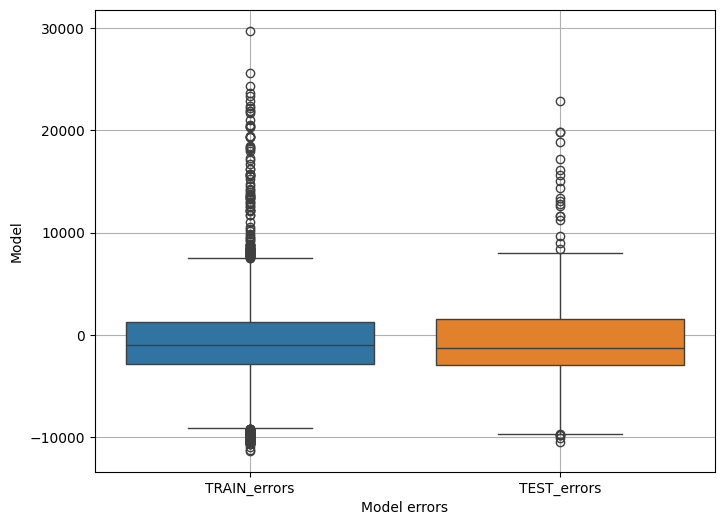

In [20]:
y_train_errors = y_train - y_train_predict
y_test_errors = y_test - y_test_predict

errors_df = pd.DataFrame({
    'TRAIN_errors': y_train_errors,
    'TEST_errors': y_test_errors
})

fig, ax = plt.subplots(figsize = (8,6))

sns.boxplot(data = errors_df, ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат
ax.grid()

In [21]:
scaler = preprocessing.MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

sgd_lr_ins = linear_model.SGDRegressor()

sgd_lr_ins.fit(X_train_scaled, y_train)

y_train_pred = sgd_lr_ins.predict(X_train_scaled)
y_test_predict = sgd_lr_ins.predict(X_test_scaled)

print_metrics(y_train, y_train_predict, y_test, y_test_predict)


R2 score TRAIN: 0.742
MAE score TRAIN: 4208
MAPE score TRAIN: 42


R2 score TEST: 0.782
MAE score TEST: 4119
MAPE score TEST: 45


In [22]:
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)

poly.fit(X_train_scaled)

X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

In [39]:
print(X_train_scaled_poly.shape)
print(X_test_scaled_poly.shape)

(1070, 54)
(268, 54)


In [24]:
lr_ins_poly = linear_model.LinearRegression()

lr_ins_poly.fit(X_train_scaled_poly, y_train)

y_train_predict = lr_ins_poly.predict(X_train_scaled_poly)
y_test_predict = lr_ins_poly.predict(X_test_scaled_poly)

print_metrics(y_train, y_train_predict, y_test, y_test_predict)
print(lr_ins.intercept_)

R2 score TRAIN: 0.842
MAE score TRAIN: 2905
MAPE score TRAIN: 30


R2 score TEST: 0.867
MAE score TEST: 2741
MAPE score TEST: 30
-12390.804294570285


In [25]:
lr_ins_poly.coef_

array([-1.96232898e+16,  2.47003539e+15,  7.27103080e+15,  3.46428070e+15,
       -5.29822956e+15, -4.31901693e+15,  6.34291630e+15,  4.40554435e+16,
        6.09877683e+16,  8.34000000e+03,  9.48000000e+02, -1.66000000e+03,
        8.58000000e+02,  2.18000000e+02,  1.96232898e+16,  1.96232898e+16,
        1.96232898e+16,  1.96232898e+16, -9.71025000e+03,  1.52787500e+03,
        6.56125000e+02,  5.48815000e+04, -2.47003539e+15, -2.47003539e+15,
       -2.47003539e+15, -2.47003539e+15, -2.11525000e+03, -1.23812500e+03,
       -2.21895312e+03, -7.27103080e+15, -7.27103080e+15, -7.27103080e+15,
       -7.27103080e+15,  4.19497847e+15,  2.49500000e+02, -7.65925917e+15,
       -7.65925917e+15, -7.65925917e+15, -7.65925917e+15, -1.10146568e+15,
        6.39969524e+15,  6.39969524e+15,  6.39969524e+15,  6.39969524e+15,
        1.43293940e+16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.66746080e+15,  0.00000000e+00,  0.00000000e+00, -3.40450664e+16,
        0.00000000e+00, -

In [26]:
lasso_lr_ins_poly = linear_model.Lasso(max_iter=2000)

lasso_lr_ins_poly.fit(X_train_scaled_poly, y_train)

y_train_predict = lasso_lr_ins_poly.predict(X_train_scaled_poly)
y_test_predict = lasso_lr_ins_poly.predict(X_test_scaled_poly)

print_metrics(y_train, y_train_predict, y_test, y_test_predict)


R2 score TRAIN: 0.842
MAE score TRAIN: 2890
MAPE score TRAIN: 29


R2 score TEST: 0.867
MAE score TEST: 2719
MAPE score TEST: 30


In [27]:
alpha_list = np.linspace(0.01, 20, 20)

train_score = []
test_score = []

for alpha in alpha_list:
    
    lasso_lr_ins_poly = linear_model.Lasso(alpha = alpha, max_iter=2000)

    lasso_lr_ins_poly.fit(X_train_scaled_poly, y_train)

    y_train_predict = lasso_lr_ins_poly.predict(X_train_scaled_poly)
    y_test_predict = lasso_lr_ins_poly.predict(X_test_scaled_poly)
    
    train_score.append(round(metrics.r2_score(y_train, y_train_predict), 3))
    test_score.append(round(metrics.r2_score(y_test, y_test_predict), 3))
    

print(train_score)
print(test_score)
alpha_list

C:\Users\nitys\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.091e+09, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(


[0.842, 0.842, 0.842, 0.841, 0.841, 0.841, 0.841, 0.84, 0.84, 0.84, 0.84, 0.839, 0.839, 0.839, 0.839, 0.839, 0.838, 0.838, 0.838, 0.838]
[0.867, 0.867, 0.867, 0.867, 0.867, 0.867, 0.867, 0.867, 0.867, 0.867, 0.867, 0.867, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866]


array([1.00000000e-02, 1.06210526e+00, 2.11421053e+00, 3.16631579e+00,
       4.21842105e+00, 5.27052632e+00, 6.32263158e+00, 7.37473684e+00,
       8.42684211e+00, 9.47894737e+00, 1.05310526e+01, 1.15831579e+01,
       1.26352632e+01, 1.36873684e+01, 1.47394737e+01, 1.57915789e+01,
       1.68436842e+01, 1.78957895e+01, 1.89478947e+01, 2.00000000e+01])

In [28]:
lasso_lr_ins_poly.coef_

array([ 4.86536643e+03,  0.00000000e+00,  2.50634004e+03, -2.65181899e+02,
        2.73896361e+03,  1.46006298e+02,  0.00000000e+00, -0.00000000e+00,
       -2.41763839e+02,  7.53232323e+03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        3.52829353e+01,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  5.20411604e+04,  1.69455538e+03,  0.00000000e+00,
       -2.08806341e+01, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  5.94982362e+02,  6.46091077e+02, -0.00000000e+00,
       -2.84770077e+02, -0.00000000e+00,  2.04617202e+02, -5.18847332e+02,
        0.00000000e+00,  0.00000000e+00, -2.45562589e+02,  5.99875490e+01,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  1.09691589e+03,
        1.08195891e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

In [38]:
ridge_lr_ins_poly = linear_model.Ridge()

ridge_lr_ins_poly.fit(X_train_scaled_poly, y_train)

y_train_predict = ridge_lr_ins_poly.predict(X_train_scaled_poly)
y_test_predict = ridge_lr_ins_poly.predict(X_test_scaled_poly)

print_metrics(y_train, y_train_predict, y_test, y_test_predict)


R2 score TRAIN: 0.839
MAE score TRAIN: 2949
MAPE score TRAIN: 30


R2 score TEST: 0.863
MAE score TEST: 2861
MAPE score TEST: 31


In [30]:
alpha_list = np.linspace(0.01, 20, 20)

train_score = []
test_score = []

for alpha in alpha_list:
    
    ridge_lr_ins_poly = linear_model.Ridge(alpha = alpha)

    ridge_lr_ins_poly.fit(X_train_scaled_poly, y_train)

    y_train_predict = ridge_lr_ins_poly.predict(X_train_scaled_poly)
    y_test_predict = ridge_lr_ins_poly.predict(X_test_scaled_poly)
    
    train_score.append(round(metrics.r2_score(y_train, y_train_predict), 3))
    test_score.append(round(metrics.r2_score(y_test, y_test_predict), 3))
    

print(train_score)
print(test_score)
alpha_list

[0.842, 0.838, 0.833, 0.827, 0.822, 0.817, 0.813, 0.81, 0.807, 0.804, 0.802, 0.799, 0.797, 0.795, 0.794, 0.792, 0.79, 0.789, 0.788, 0.786]
[0.867, 0.863, 0.857, 0.852, 0.847, 0.842, 0.838, 0.835, 0.832, 0.83, 0.827, 0.825, 0.823, 0.821, 0.82, 0.818, 0.817, 0.816, 0.814, 0.813]


array([1.00000000e-02, 1.06210526e+00, 2.11421053e+00, 3.16631579e+00,
       4.21842105e+00, 5.27052632e+00, 6.32263158e+00, 7.37473684e+00,
       8.42684211e+00, 9.47894737e+00, 1.05310526e+01, 1.15831579e+01,
       1.26352632e+01, 1.36873684e+01, 1.47394737e+01, 1.57915789e+01,
       1.68436842e+01, 1.78957895e+01, 1.89478947e+01, 2.00000000e+01])

In [31]:
ridge_lr_ins_poly.coef_

array([ 3.82258265e+03,  3.05705869e+03,  1.01156217e+03, -6.33725803e+02,
        6.73333624e+03,  1.80759375e+02,  9.22462302e+01, -1.51394810e+02,
       -1.21610795e+02,  4.68314482e+03,  2.39382608e+03,  9.23138629e+02,
        6.24365558e+02,  2.81481792e+03,  7.47721552e+02,  8.01399992e+02,
        1.02025683e+03,  1.25320427e+03,  1.52693760e+03,  1.52057320e+03,
        1.35536035e+03,  1.23894977e+04,  2.00824117e+03,  5.02267191e+02,
        3.69356159e+02,  1.77194174e+02,  1.13895451e+02, -6.70600882e+01,
        3.97712040e+01,  1.09576511e+03,  7.20564025e+02,  2.45847413e+01,
       -8.29351708e+02, -6.33725803e+02,  2.67602131e+03, -4.20961545e+02,
        9.70577107e+01, -5.65984685e+01, -2.53223500e+02,  6.73333624e+03,
       -1.37012919e+00,  3.44268177e+02,  3.33270396e+03,  3.05773423e+03,
        1.80759375e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        9.22462302e+01,  0.00000000e+00,  0.00000000e+00, -1.51394810e+02,
        0.00000000e+00, -

In [60]:
!pip freeze requirements.txt


altgraph==0.17.4
annotated-types==0.7.0
asttokens==2.4.1
attrs==23.2.0
auto-py-to-exe==2.45.1
beautifulsoup4==4.12.3
bottle==0.13.2
bottle-websocket==0.2.9
Brotli==1.1.0
category-encoders==2.6.3
certifi==2024.7.4
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.3.2
click==8.1.7
cloudpickle==3.1.0
clustergram==0.8.1
colorama==0.4.6
comet-ml==3.47.0
comm==0.2.1
configobj==5.0.9
contourpy==1.2.0
country-converter==1.2
coverage==7.6.1
cycler==0.12.1
dacite==1.8.1
dash==2.17.1
dash-bootstrap-components==1.3.1
dash-core-components==2.0.0
dash-html-components==2.0.0
dash-table==5.0.0
dash_colorscales==0.0.4
dash_daq==0.5.0
dask==2024.10.0
dask-expr==1.1.16
debugpy==1.8.0
decorator==5.1.1
docutils==0.21.2
dtale==3.13.1
dulwich==0.22.1
Eel==0.18.1
et-xmlfile==1.1.0
everett==3.1.0
executing==2.0.1
fastjsonschema==2.19.1
Flask==2.2.5
Flask-Compress==1.15
flask-ngrok==0.0.25
fonttools==4.50.0
fsspec==2024.10.0
future==1.0.0
gevent==24.11.1
gevent-websocket==0.10.1
greenlet==3.1.1
htmlmin==0.1.12
